Polynomial Regression

In the previous session we have performed <a href = "https://gitlab.com/sunilghimire/linear-regression-guide/-/blob/master/LinearRegression.ipynb"> Simple Linear Regression </a> having one independent variable (X) and one dependent variable (y) which measure what extent there is a Linear relationship between two variables where the main purpose of linear regression is to 'predict' the value of the dependent variable based upon the values of ones or more independent variables. <br> And similarly we have performed <a href = "https://gitlab.com/sunilghimire/multilinear-regression/-/blob/master/MultipleLinearRegression.ipynb"> Multiple Linear Regression </a> which help us to analysis how much will the dependent vaariable change when we change the independent variables. <br>

In this jupyter file I am going discussed about Polynomial Regression where polynomial regression is a type of linear regression in which provides best approximation of the relatonship between the independent variable "X" and dependent "y" that is modeled as polynomial of nth degree.



## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

## Importing the dataset

The below command is used to import CSV dataset

In [2]:
dataset = pd.read_csv('./dataset./Position_Salaries.csv')
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Let's check the number of rows and columns in our dataset where there are 10 number of rows and 3 number of columns.

In [3]:
dataset.shape

(10, 3)

Pandas's describe() method is used to view basic statistical details like percentile, mean, std etc.

In [4]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


Now, our next task is to seperate features and label from our dataset. Our dataset contains only 3 columns where second column i.e. Level is the independent variables 'X' and last column salary is the dependent variable 'y' which is going to be predict. We want to predict Salary depending upon the Level. 

In [5]:
features = dataset.iloc[:, dataset.columns == 'Level'].values
features

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
label = dataset.iloc[:, dataset.columns == 'Salary'].values
label

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Generated data looks like

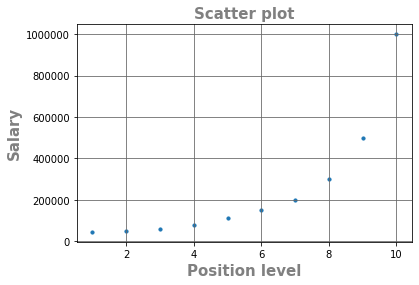

In [7]:
plt.scatter(features,label,s=10)
plt.title('Scatter plot', fontweight='bold', fontsize = '15', color = "gray")
plt.xlabel('Position level', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Salary', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

## Applying Linear Regression model to this dataset

In this step we are Visualizing the Linear Regression results using scatter plot

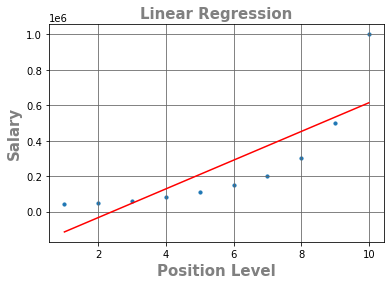

The R2 score for this model is 0.6690412331929895


In [9]:
from sklearn.linear_model import LinearRegression 

model_linear  = LinearRegression()
model_linear.fit(features,label)
y_pred_linear = model_linear.predict(features)

plt.scatter(features,label, s=10)
plt.title('Linear Regression',  fontweight='bold', fontsize = '15', color = "gray"),  
plt.plot(features, y_pred_linear, color = 'r')
plt.xlabel('Position Level', fontweight='bold', fontsize = '15', color = "gray")
plt.ylabel('Salary', fontweight='bold', fontsize = '15', color = "gray")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()
print("The R2 score for this model is",r2_score(label,y_pred_linear))

The above graph is unable to capture the patterns in the data. This is an example of under-fitting which is unable to capture the underlying trend of the data and model does not fit the data well enough. <br>
To overcome under-fiiting in our model, we need to increase the complexity of the model. When computing the R2 score of this lineare line gives 0.6690412331929895<br>

The equation for the linear model is shown below: <br>
y = $\beta_0$ + $\beta_1X$ ......... (i)

To generate high order of equation we can add powers to the original features as new features. The equation  (i) can be transformed to: <br>

y = $\beta_0$ + $\beta_1X^1$ + $\beta_1X^2$ + ... $\beta_nX^n$......... (ii) <br>
where y is the predicted outcome value for the polynomial model with regression coefficients $\beta_1$ to $\beta_n$ for each degress and Y intercept $\beta_0$. The power of predictors raised to 1 to n. <br>

When n = 2 polynomial forms quadractic expresssion with parabolic curve. <br>

When n = 3 polynomial forms a cubic curve <br>

When n = 4 polynomial forms a quartic expression.

Advantages of polynomial regression are:
    1. It give more reliable results with the large number of obeservatins.
    2. It do not extrapolate the observed values beyond the limits.
    3. The degree of polynomial equations can be scale down when higher degree polynomial cause overflow

We will use the PolynomialFeatures class given by scikit-learn to translate the original functions into their higher order terms

In [7]:
from sklearn.preprocessing import PolynomialFeatures
degree = int(input('Enter degree: \n'))

def create_polynomial_regression_model(degree):
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(features)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, label)

    plt.scatter(features, label, color='red')
    plt.plot(features,lin_reg.predict(poly_reg.fit_transform(features)), color='blue')
    plt.title('Polynomial Regression', fontweight='bold', fontsize = '15', color = "gray")
    plt.xlabel('Position level',  fontweight='bold', fontsize = '15', color = "gray")
    plt.ylabel('Salary', fontweight='bold', fontsize = '15', color = "gray")
    plt.grid(b=True, which='major', color='#666666', linestyle='-')

    plt.show()
    return 


Enter degree: 
3


Fitting a linear regression model on the transformed feaatures gives the below plot.

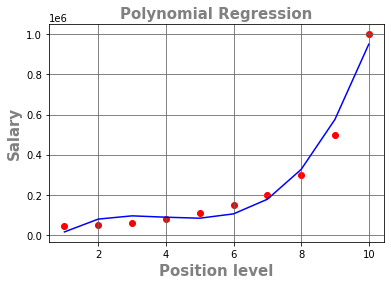

In [10]:
create_polynomial_regression_model(degree)

It is quite clear from the plot that the quadratic curve is able to fit the data scatter than the linear line.

Computing the RMSE and $R^2$ of the above plot gives following result:
where $R^2$ is statistical measure of how close the data are to be fitted on regression line that represents the proportion of the variance for a dependent variable that's explained by an independent variable for the variables in a regression model also known as coefficient of determination. <br>
If the $R^2$ of a model is 0.5 that means observed line is half of the observed variation. <br>

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors) where it tells how concentrated the data is around the line of best fit.

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

entry_degree = int(input('Enter Degree: \n'))
polynomial_features= PolynomialFeatures(entry_degree)
x_poly = polynomial_features.fit_transform(features)

model = LinearRegression()
model.fit(x_poly, label)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(label,y_poly_pred))
r2 = r2_score(label,y_poly_pred)
print('The RMSE of the polynomial regression model is:',rmse)
print('The R2 score of the polynomial regression model is:',r2) 

Enter Degree: 
3
The RMSE of the polynomial regression model is: 38931.504012329184
The R2 score of the polynomial regression model is: 0.9812097727913367


The $R^2$ score came out to be 0.99 and plot was shown in above graph. Here, degree 4 gives the much useful result.
<br>
So next time you find that your data is not just linear for regression, use the polynomial features to play around with your model to get the best fit for your train, check and hold-out package.

In [15]:
degree = int(input("Enter number of degree: \n"))
poly_reg = PolynomialFeatures(degree)
X_poly = poly_reg.fit_transform(features)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, label)

Enter number of degree: 
4


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The below command helps to predict the new result for linear and polynomial model.

In [16]:
# Predicting a new result with Linear Regression
test_X1 = np.array(6.5).reshape(-1, 1)
model_linear.predict(test_X1)

array([[330378.78787879]])

In [17]:
# Predicting a new result with Polynomial Regression
test_X2 = np.array(6.5).reshape(-1, 1)
lin_reg.predict(poly_reg.fit_transform(test_X2))

array([[158862.45265153]])